In [2]:
%load_ext autoreload
%autoreload 2
import sigcom
from sigcom.coding.atsc import pck_long
from scipy.sparse import coo_matrix, csc_matrix, csr_matrix
import numpy as np
from numba import njit

In [25]:
from sigcom.coding.util import make_pck, get_parity_interleaver, get_layerwise_pck, layerwise_pcks_to_PCM

In [26]:
code = pck_long.get_pck([8,15])

In [34]:
layerwise_pck,_ = get_layerwise_pck(code,True)
PCM = layerwise_pcks_to_PCM(layerwise_pck, code)
PCM.sum(axis=1).reshape(-1)

matrix([[  9.,  10.,  10., ...,   9.,   9.,   9.]])

In [32]:
layerwise_pck,_ = get_layerwise_pck(code,True)
len(layerwise_pck)*360

30240

In [24]:
I = H[:,bil]
N_layers = int((N-K)/360)
Z = I[::N_layers]
for i in range(1, N_layers):
    Z = vstack((Z, I[i::N_layers]))

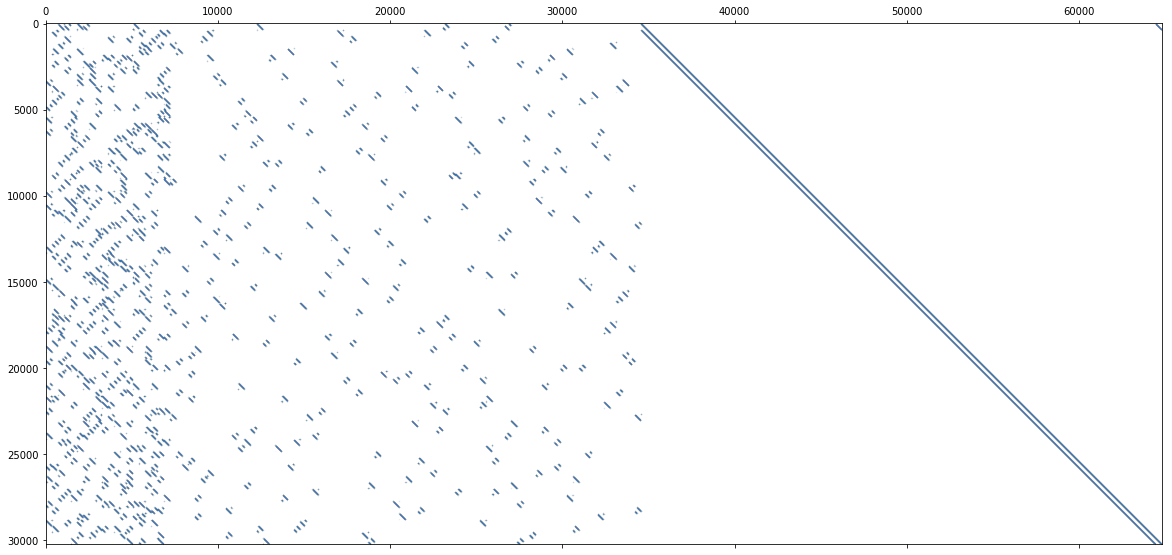

In [34]:
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches((20,10))
plt.spy(Z,markersize=.01)
plt.show()

In [17]:
from scipy.sparse import vstack

In [22]:
print(list(range(1,10)))

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [90]:
isParityPermuted = True
layerwise_pcks, diagOffsets = get_layerwise_pck(code, isParityPermuted)

In [113]:
pck = np.array(layerwise_pcks[20])
print(pck[:,0]+pck[:,1])
_,x=np.nonzero(I[20,:])
print(x)


[ 1529  3628  4016  5377  5546 18208 24873 29623 41760 41400]
[ 1529  3628  4016  5377  5546 18208 24873 29623 41400 41760]


In [58]:
ds=[-1,1,2,4]
x=[[d,1] for d in ds]
es=[-1,1,2,4]
x.extend([[e,2] for e in es])
x

[[-1, 1], [1, 1], [2, 1], [4, 1], [-1, 2], [1, 2], [2, 2], [4, 2]]

In [18]:
[2]*10

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [141]:
cols = []
rows = []
row = 0
for i, pck in enumerate(layerwise_pcks):
    pck = np.array(pck)
    for m in range(code['nCyclicFactor']):
        if i==0 and m==0:
            x = pck[:-1,0] + (pck[:-1,1]+m) % code['nCyclicFactor']
            print(x)
        else:
            x = pck[:,0] + (pck[:,1]+m) % code['nCyclicFactor']
        cols.extend(x)
        rows.extend(np.ones(len(x))*row)
        row+=1

[ 1053  1330  1834  2380  5110 12255 23180 26885 34560]


In [140]:
H = csr_matrix((np.ones(len(rows)), (rows,cols)), shape=(N-K,N))
H[0,-1]

0.0

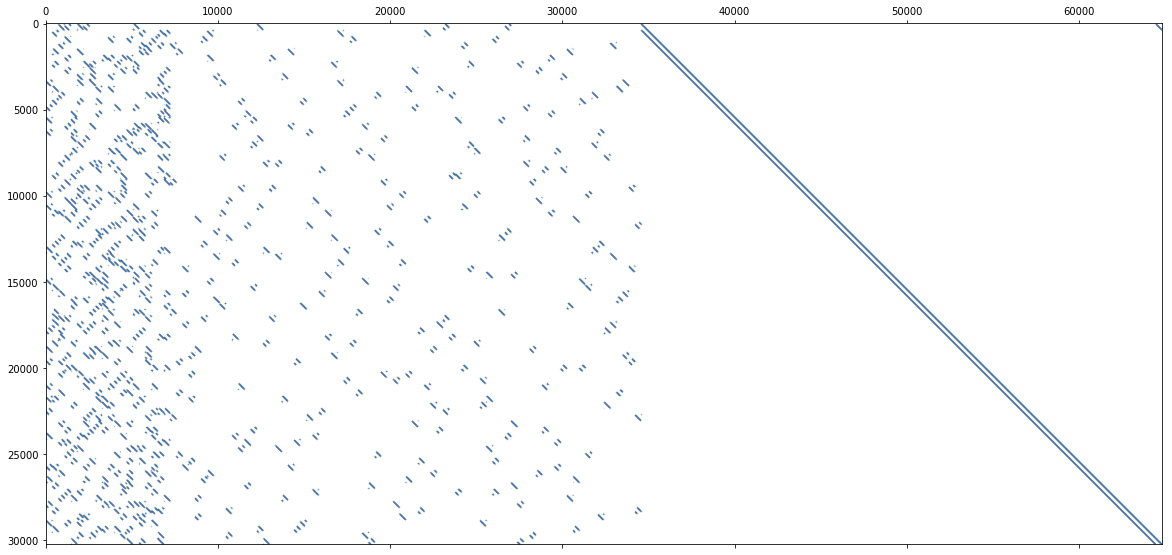

In [142]:
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches((20,10))
plt.spy(H,markersize=.01)
plt.show()

In [143]:
H[0,-1]

0.0

In [134]:
layerwise_pcks[0]

[[720, 333],
 [1080, 250],
 [1800, 34],
 [2160, 220],
 [5040, 70],
 [12240, 15],
 [23040, 140],
 [26640, 245],
 [34560, 0],
 [64440, 359]]

In [144]:
x=y=[]

In [145]:
x

[]

In [47]:
from sigcom.rx.util import *
from sigcom.tx.util import *

In [52]:
SNR_dB = 0
N_cells = 10000
ldM = 2

N_bits = ldM * N_cells
M = 2**ldM

bits = generate_bits(N_bits)
qam = qam_alphabet(M)
tx = map_bits_to_symbol_alphabet(bits, qam)
noise = make_noise(int(N_bits/ldM))
SNR = 10**(SNR_dB/10)
rx = tx + noise / np.sqrt(SNR)
La = (1-2*bits)*10
Llrs = demap(rx, qam, SNR, La)
print(Llrs[:10])
print(bits[:10])

[ 10.39919533  -8.47817329 -13.98293406  14.36052037  10.24731022
   9.68388221  14.36428293  12.95184172  11.81214334   9.33044517]
[0 1 1 0 0 0 0 0 0 0]


In [60]:
p=np.array([3,2,0,1])
b=np.array([-1,2,11,3])
b[p]

array([ 3, 11, -1,  2])

In [63]:
d=[]
d[p]=b
d

TypeError: only integer scalar arrays can be converted to a scalar index